<font size=5>**Чалова Ирина ИМБО-01-19**

# **Прикладные задачи нелинейной динамики**
## **Лабораторная работа №8. Параметрическое исследование логистического отображения**
### **Параметрическое исследование логистического отображения. Компьютерное построение бифуркационной диаграммы.**

Изображение однопараметрической зависимости $x_n(r)$ на плоскости $(r,x)$ называют **бифуркационной диаграммой** или же **деревом Фейгенбаума**. По горизонтальной оси отложены значения параметра $r$, по вертикальной 
– значения $x_n$, принадлежащие установившемуся режиму.

На такой диаграмме отчетливо видна внезапная смена динамических режимов. При переходе параметра $r$ через бифуркационные значения реализуется сценарий превращения регулярных режимов в хаос через удвоения периода. В этой связи саму диаграмму называют бифуркационной. 

Логистическое отображение (вариант $1$):
$$ x_{n+1}=1-r · x_n^2, (0<r≤2)$$

In [1]:
library(ggplot2)

# Опции для построения графиков
options(repr.plot.width=16,         # Ширина картинки
        repr.plot.height=10)        # Высота картинки


Предполагается, что за несколько сотен итераций $(j1)$ переходный 
процесс завершается и система выходит на стационарный режим, для которого рассчитывается еще несколько сотен точек $(j2)$.

In [2]:
x0 <- 0.1
r0 <- 0
max <- 2
delta <- 0.001
j1 <- 150
j2 <- 500
v <- vector(mode = "numeric")
vj <- vector(mode = "numeric")
resv <- vector(mode = "numeric")
resj <- vector(mode = "numeric")
i <- 0
x <- x0

for (r in seq(r0,max,delta)) {
    for (j in c(0:j1)) {
        x <- 1 - r * x ** 2
    }

    for (j in c(0:j2)) {
        x <- 1 - r * x ** 2
        v[j] <- x
        vj[j] <- r
    }
    
    resv <- c(resv,v)
    resj <- c(resj,vj)
    i <- i + 1 
}

In [3]:
tree <- ggplot() +
    geom_point(aes(y = resv, x = resj), cex = .01) +
    theme(axis.text.x = element_text(angle = 250)) +
    labs(title = "Бифуркационная диаграмма (дерево Фейгенбаума)", 
         subtitle = "x_(n+1)=1-r·x_n^2",
         x = "r", 
         y = "x_(n+1)=1-r·x_n^2") +
    scale_x_continuous(breaks = seq(r0, max, 0.05)) +
    scale_y_continuous(breaks = seq(0, 4, 0.2)) 
    geom_vline(xintercept = c(0.751, 1.251, 1.37, 1.396, 1.475, 1.625, 1.75), color = "blue", lwd = .3) 

mapping: xintercept = ~xintercept 
geom_vline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

Бифуркационным точкам, в которых происходит смена одного устойчивого режима другим, соответствуют точки ветвления на диаграмме.

На полученной диаграмме видно, как ветвь 
сначала разделяется на две, затем на четыре, восемь и т.д. веточек, 
демонстрируя, таким образом, сценарий удвоения периода. 

При $r > r^∞ > 1,4$ поведение системы перестает проявлять периодические 
свойства и напоминает стохастический процесс, причина которого в 
сверхчувствительности решения к изменению начальных условий. Слишком плотное расположение точек по параметру $r$ приводит к появлению на 
диаграмме сплошных полос, которые соответствуют хаосу.

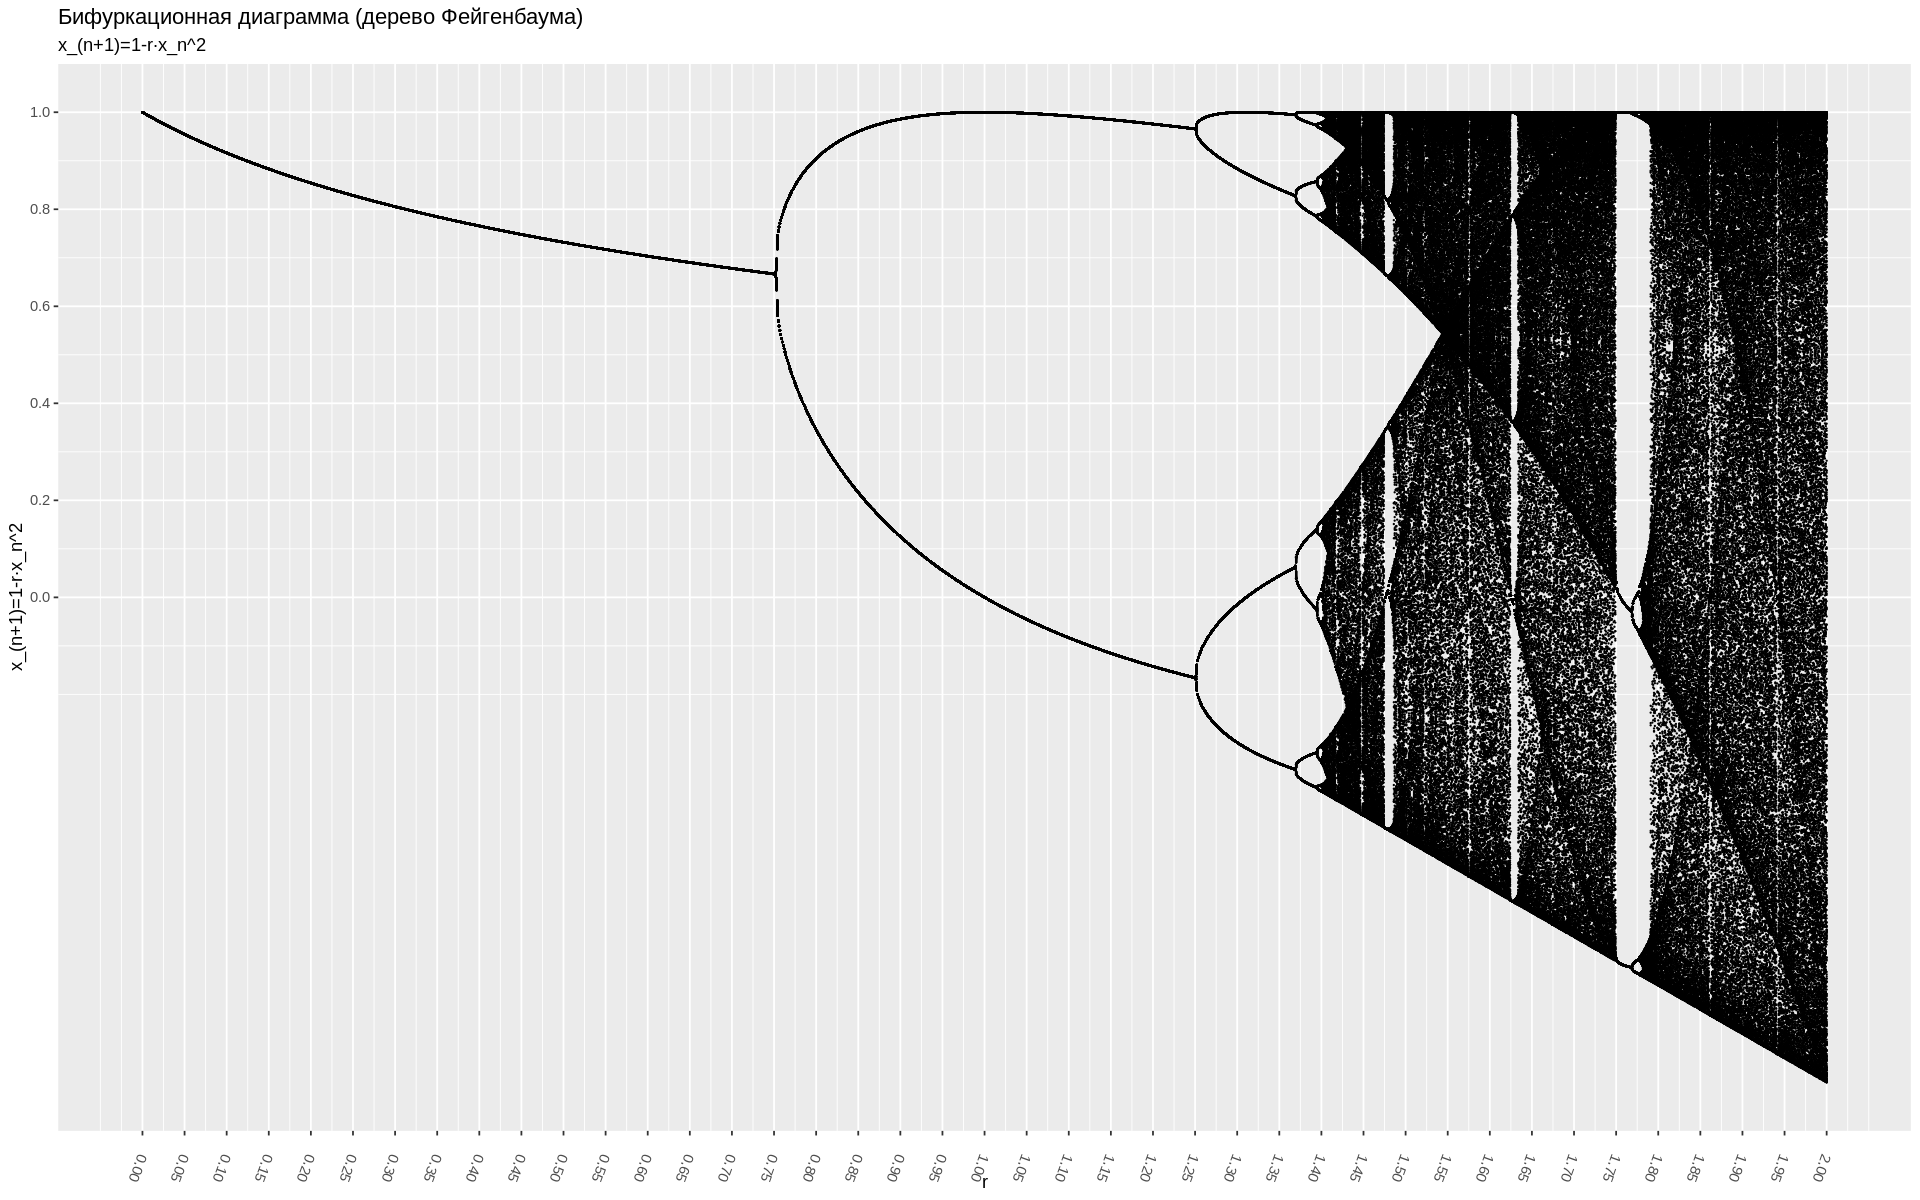

In [4]:
tree

Бифуркационная диаграмма обладает самоподобием или фрактальной структурой. Самоподобный объект в точности или приближенно совпадает с частью самого себя, в результате целое имеет ту же форму, что и 
одна из его частей. 

Единственное значение отображения определяется до значения $r\approx 0,75 $, далее проходит цикл с периодом $2$ до $r\approx 1,26$, затем проходит цикл с периодом $4$ до $r\approx 1,375$, затем начинается цикл с периодом $8$ и далее возникает хаос.

Демонстрация фрактального характера диаграммы (выделение фрагмента начальной диаграммы и увеличение ее масштаба):

In [5]:
tree_cut <- ggplot() +
    geom_point(aes(y = resv, x = resj), cex = .01) +
    theme(axis.text.x = element_text(angle = 270, hjust = 1)) +
    labs(title = "Приближение r = 1.85 для дерева Фейгенбаума", 
         subtitle = "x_(n+1)=1-r·x_n^2",
         x = "r", 
         y = "x_(n+1)=1-r·x_n^2") +
    scale_x_continuous(breaks = seq(r0, max, 0.005)) +
    scale_y_continuous(breaks = seq(0, 4, 0.2)) +
    coord_cartesian(xlim = c(1.85, 1.3)) +
    geom_vline(xintercept = c(1.75, 1.768, 1.777, 1.791), color = "blue", lwd = .3) 

Самым широким окном периодичности в закритической области является трёхкратный цикл. Он начинается в точке $r \approx 1,75$, в точке $r \approx 1,768$ происходит бифуркация и появляется шестикратный цикл, а при $r \approx 1,777$ – двенадцатикратный. Далее, начиная с $r \approx 1,791$, снова возникает хаос.

In [ ]:
tree_cut

Одной из универсальных характеристик является разность значений $r_m$, которые 
соответствуют двум следующим друг за другом бифуркациям. Величина 
разности уменьшается каждый раз в соответствии с практически постоянным 
коэффициентом: 

$$\lim_{m\to 0} \frac{r_m-r_{m-1}}{r_{m+1}-r_m}=δ,$$

где $δ ≈ 4,66920160910299…$ – первая универсальная константа Фейгенбаума. 

In [ ]:
m <- 4 # define x as a symbolic variable
r <- c(0.751, 1.251, 1.37, 1.396, 1.475, 1.625, 1.75, 1.768, 1.777, 1.791)

del_1 <- (r[2]-r[1])/(r[3]-r[2])
del_2 <- (r[3]-r[2])/(r[4]-r[3])
del_1
del_2

[1] 4.201681

[1] 4.576923